# operasi titik

In [2]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

img = cv2.imread('photo bnw(1).jpg',0)

min_val = np.min(img)
max_val = np.max(img)
stretched_img = 255 * (img - min_val - min_val) / (max_val - min_val)   

stretched_img = np.uint8(stretched_img)

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('gambar asli dengan kontras rendah'), plt.axis('off')
plt.subplot(122), plt.imshow(stretched_img, cmap='gray')
plt.title('gambar setelah penskalaan kontras'), plt.axis('off')
plt.show()

TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

# operasi spasial

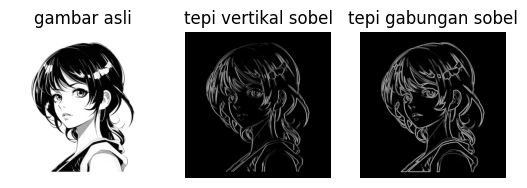

In [2]:
img = cv2.imread('photo bnw(1).jpg',0)

sobelx = cv2.Sobel(img, cv2.CV_64F,1, 0, ksize=5)
sobely = cv2.Sobel(img, cv2.CV_64F,0, 1, ksize=5)

sobel_combined = cv2.magnitude(sobelx,sobely)


plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('gambar asli'), plt.axis('off')
plt.subplot(132), plt.imshow(np.abs(sobelx), cmap='gray')
plt.title('tepi vertikal sobel'), plt.axis('off')
plt.subplot(133), plt.imshow(sobel_combined, cmap='gray')
plt.title('tepi gabungan sobel'), plt.axis('off')
plt.show()

# operasi transformasi

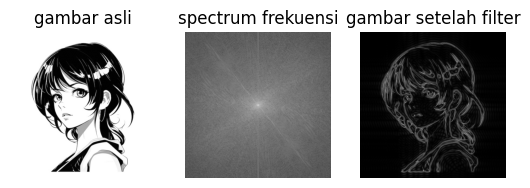

In [4]:
img = cv2.imread('photo bnw(1).jpg',0)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

magnitude_spectrum = 20 * np.log(np.abs(fshift))

plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('gambar asli'), plt.axis('off')
plt.subplot(132), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('spectrum frekuensi'), plt.axis('off')

rows, cols = img.shape
crow, ccol = rows // 2 , cols // 2
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0

f_sift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_sift)
img_back = np.abs(img_back)

plt.subplot(133), plt.imshow(img_back, cmap='gray')
plt.title('gambar setelah filter'), plt.axis('off')
plt.show()